# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells. If you prefer making multiple answer cells that's also ok, but make sure I know which question you're answering where.
3. You can split up code answers into multiple cells if you like, but keep them in order for me to grade!
3. You get partial points for partial answers. This means you can still get points for coding questions if you explain your reasoning, but don't manage the code itself.
4. You have 120 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
4. Unless specified otherwise you may assume graphs are simple and undirected.
6. Your final grade will be `score / 70 * 9 + 1`


# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [1]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Example for how to get documentation from within the notebook
nx.Graph?

1 {2: {'color': 4.7, 'noncolor': 'kek'}, 5: {'noncolor': 'red', 'color': 'green'}}
2 {1: {'color': 4.7, 'noncolor': 'kek'}, 5: {'noncolor': 'red', 'color': 'green'}}
5 {1: {'noncolor': 'red', 'color': 'green'}, 2: {'noncolor': 'red', 'color': 'green'}, 4: {'noncolor': 'red', 'color': 'blue'}}
3 {4: {'noncolor': 'red', 'color': 'green'}}
4 {3: {'noncolor': 'red', 'color': 'green'}, 5: {'noncolor': 'red', 'color': 'blue'}}
1 2 4.7
1 5 green
2 5 green
5 4 blue
3 4 green
(1, 2) {'color': 4.7, 'noncolor': 'kek'}
(1, 5) {'noncolor': 'red', 'color': 'green'}
(2, 5) {'noncolor': 'red', 'color': 'green'}
(5, 4) {'noncolor': 'red', 'color': 'blue'}
(3, 4) {'noncolor': 'red', 'color': 'green'}
1 {}
2 {}
5 {}
3 {}
4 {}
1 -1
2 0


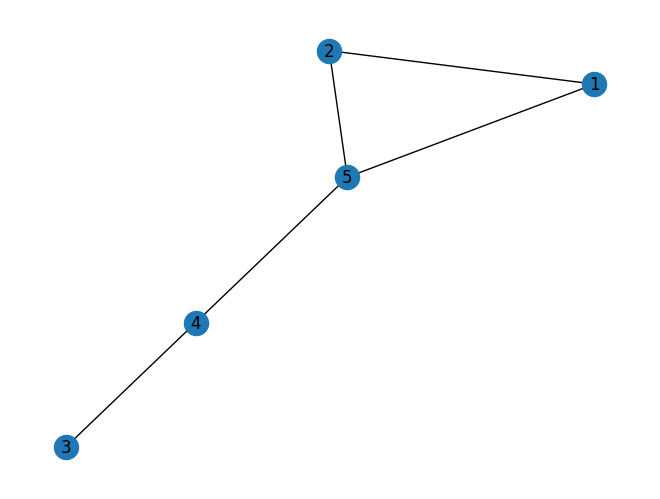

In [40]:
G = nx.Graph()
G.add_edge(1, 2, color=4.7, noncolor='kek')
G.add_edges_from([(1, 5), (3, 4), (2, 5), (4, 5, {"color": "blue"})], noncolor="red", color="green")
nx.draw(G, with_labels=True)
for n, nbrsdict in G.adjacency():
    print(n, nbrsdict)
for u, v, color in G.edges.data("color"):
    print(u, v, color)
for u, v in G.edges.items():
    print(u, v)
for u, v in G.nodes.items():
    print(u, v)

G2 = nx.DiGraph()
G2.add_edge(1, 2)
for node in G2:
#     if node == 1:
#         continue
    path_length = nx.shortest_path_length(G2, 1, node) - 1
    print(node, path_length)


## Question 1 (10pt)

Answer the following questions.

1. What is the definition of an Eulerian cycle?
1. What is the definition of a Hamiltonian cycle?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Eulerian cycle of this graph (assuming it exists)?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Hamiltonian cycle of this graph (assuming it exists)?
1. What criteria must a graph meet for an Eulerian cycle to exist? And an Eulerian tour?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $x = \max\limits_{u \in V} \max\limits_{v \in V} d(u, v) $. The quantity $x$ has a name; what is its name?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $y = \min\limits_{u \in V} \max\limits_{v \in V} d(u, v) $. The quantity $y$ has a name; what is its name?

In [4]:
## Answers to question 1
#1 A cycle that crosses each edge in a graph exactly once
#2 A cycle that crosses each node in a graph exactly once
#3 It crosses k edges and k nodes
#4 n nodes and n edges
#5 Each node must have an even degree for an Eulerian cycle to exist. 
#  0 or 2 nodes with an odd degree for an Eulerian tour.
#6 The longest shortest path between any 2 nodes in a graph. This is the diameter of the graph
#7 For each node, find the longest shortest path to any other node, then take the shortest. 
#  In other words, the radius of the graph


## Question 2 (20pt)

1. Take a look at the file "foodwebs.txt". It models the predatory relationships in a marine ecosystem ("who eats whom"). Each line in the file contains at least 2 values, separated by commas. The first value is a "Species", and all other values on the line are "Species they feed on". The latter lists for every species the other species in the table that they eat. (Except for the so-called "primary producers" like the seaweed Kelp which "eat" inorganic resources like sunlight. These have a prey list denoted "-"). For example, "Shark" eats "Sea otter"; and "Sea stars" eats "Abalone", "small herbivorous fishes", and "sea urchins". This web can be modeled as a digraph; the species are in vertices and arcs represent an "eaten by" relationship between two species (from prey to predator). Construct such a digraph by parsing the "foodwebs.txt" comma-separated-file and using the appropriate NetworkX objects. Plot this digraph as well and check that it is weakly connected.
  
  If you don't manage, use the following code snippet to continue. You will then get 0 points on this subquestion, however.
  ```py
  with open('foodweb.pickle', 'rb') as jar:
       digraph = pickle.load(jar)
  ```

2. Ecologists like to understand an ecosystem in terms of trophic levels, that is groups of predators which eat prey of comparable size/type (sometimes also called an ecological "niche"). Let's try to infer these trophic levels automatically from our dataset, using network methods. We can imagine two different methods:

  - The first possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the shortest path from a level 0 species to X is of length k.
  - The second possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the longest path from a level 0 species to X is of length k.
  
  Implement both these possible definitions as the functions "trophic_short" and "trophic_long" respectively and calculate the trophic level for all species in the foodweb with both functions.

3. Which of the two methods results in trophic levels which best matches the idea of a "trophic level" discussed above, of predators which feast on similar type/size of prey? Provide arguments for your answer!

['sea otter', 'shark', 'sea stars', 'sea urchins', 'large crabs', 'large fishes and octopus', 'abalone', 'small herbivorous fishes and invertebrates', 'kelp', 'sessile invertebrates', 'organic debris', 'smaller predatory fishes and invertebrates', 'planktonic invertebrates', '-', 'microscopic planktonic algae']
True


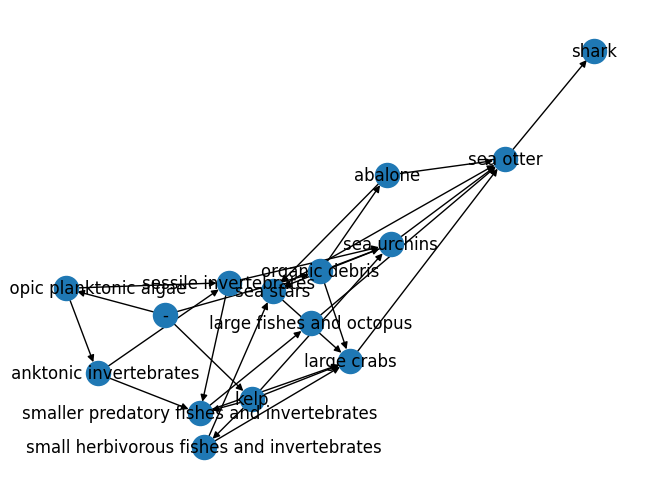

In [30]:
## Answers to Question 2

graph = nx.DiGraph()
with open('foodweb.txt') as infile:
    for line in infile:
        species = line.split(',')
        predator = species[0]
        prey = species[1:]
        predator = predator.strip().casefold()
        for single_prey in prey:
            single_prey = single_prey.strip().casefold()
            graph.add_edge(single_prey, predator)
print(graph.nodes)
nx.draw(graph, with_labels=True)
print(nx.is_weakly_connected(graph))

In [53]:
def trophic_short(graph):
    distances = {}
    for node in graph:
        path_length = nx.shortest_path_length(graph, '-', node) - 1
        distances[node] = path_length
    return distances

print(trophic_short(graph))

def get_longest_path(graph, source, target):
    ## longest path without accounting the weights
    if source == target:
        return -1
    res = max(nx.all_simple_paths(graph, source, target), key=lambda x: len(x))
#     print(len(res), res)
    return len(res) - 2

def trophic_long(graph):
    distances = {}
    # This doesn' twork, since dag_longest_path_length returns the longest path in general,
    # rather than between 2 nodes.
    # Instead, we need to first topologically sort the nodes, and then determine the path
    # lengths from there.

    for node in graph:
        get_longest_path(graph, '-', node) 
        path_length = get_longest_path(graph, '-', node)
        distances[node] = path_length
    return distances
print(trophic_long(graph))


###########longest path accounting the weights, successors==neighbors
def single_source_longest_dag_path_length(graph, s):
    assert(graph.in_degree(s) == 0)
    dist = dict.fromkeys(graph.nodes, -float('inf'))
    dist[s] = 0
    topo_order = nx.topological_sort(graph)
    for n in topo_order:
        for s in graph.successors(n):
            if dist[s] < dist[n] + graph.edges[n,s]['weight']:
                dist[s] = dist[n] + graph.edges[n,s]['weight']
    return dist

{'sea otter': 2, 'shark': 3, 'sea stars': 2, 'sea urchins': 1, 'large crabs': 1, 'large fishes and octopus': 2, 'abalone': 1, 'small herbivorous fishes and invertebrates': 1, 'kelp': 0, 'sessile invertebrates': 1, 'organic debris': 0, 'smaller predatory fishes and invertebrates': 1, 'planktonic invertebrates': 1, '-': -1, 'microscopic planktonic algae': 0}
{'sea otter': 6, 'shark': 7, 'sea stars': 4, 'sea urchins': 3, 'large crabs': 5, 'large fishes and octopus': 4, 'abalone': 1, 'small herbivorous fishes and invertebrates': 1, 'kelp': 0, 'sessile invertebrates': 2, 'organic debris': 0, 'smaller predatory fishes and invertebrates': 3, 'planktonic invertebrates': 1, '-': -1, 'microscopic planktonic algae': 0}


## Question 3 (20 pt)

The Davis southern women graph is constructed from data collected by Davis et al. in the 1930s. They tracked the attendence of a number of women to several social clubs.

1. Load the graph in the file "dwcg.gml". This file is in GML format. If you don't manage, use the following snippet to get 0 point at this subquestion: `graph = nx.davis_southern_women_graph()`.
1. What class/type of graph is this? Be as specific as possible
1. How many social clubs are there? How many women?
1. Plot a histogram of the sizes of the clubs, and a histogram of the number of clubs women are part of.
1. Which clubs have the most members in common?

[('Evelyn Jefferson', {'bipartite': 0}), ('Laura Mandeville', {'bipartite': 0}), ('Theresa Anderson', {'bipartite': 0}), ('Brenda Rogers', {'bipartite': 0}), ('Charlotte McDowd', {'bipartite': 0}), ('Frances Anderson', {'bipartite': 0}), ('Eleanor Nye', {'bipartite': 0}), ('Pearl Oglethorpe', {'bipartite': 0}), ('Ruth DeSand', {'bipartite': 0}), ('Verne Sanderson', {'bipartite': 0}), ('Myra Liddel', {'bipartite': 0}), ('Katherina Rogers', {'bipartite': 0}), ('Sylvia Avondale', {'bipartite': 0}), ('Nora Fayette', {'bipartite': 0}), ('Helen Lloyd', {'bipartite': 0}), ('Dorothy Murchison', {'bipartite': 0}), ('Olivia Carleton', {'bipartite': 0}), ('Flora Price', {'bipartite': 0}), ('E1', {'bipartite': 1}), ('E2', {'bipartite': 1}), ('E3', {'bipartite': 1}), ('E4', {'bipartite': 1}), ('E5', {'bipartite': 1}), ('E6', {'bipartite': 1}), ('E7', {'bipartite': 1}), ('E8', {'bipartite': 1}), ('E9', {'bipartite': 1}), ('E10', {'bipartite': 1}), ('E11', {'bipartite': 1}), ('E12', {'bipartite': 1})

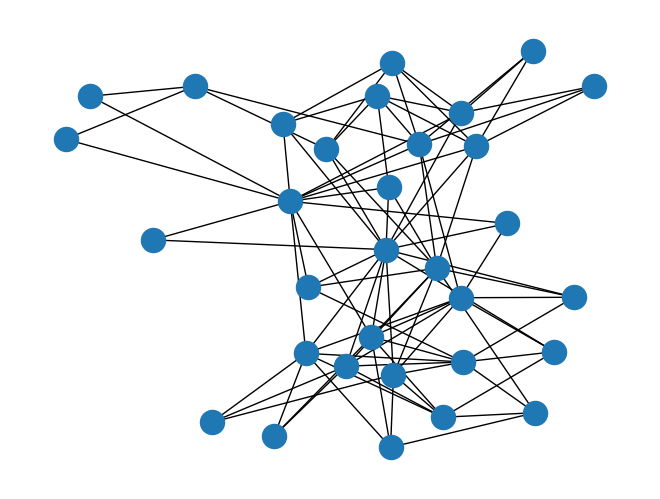

In [56]:
## Answers to Question 3
graph = nx.read_gml('dswc.gml')
print(graph.nodes(data=True))
print(nx.is_bipartite(graph))
# It's connected, undirected, bipartite graph.


women = {node for node in graph if graph.nodes[node]['bipartite'] == 0}
clubs = {node for node in graph if graph.nodes[node]['bipartite'] == 1}
print(len(women), women)
print(len(clubs), clubs)
layout = nx.bipartite_layout(graph, nodes=women)
nx.draw(graph, pos=layout)

In [57]:
size_of_clubs = {}
for node in clubs:
    size_of_clubs[node] = graph.degree(node)
print(size_of_clubs)
clubs_per_woman = {}
for node in women:
    clubs_per_woman[node] = graph.degree(node)

print(clubs_per_woman)

{'E13': 3, 'E2': 3, 'E7': 10, 'E8': 14, 'E10': 5, 'E14': 3, 'E1': 3, 'E4': 4, 'E3': 6, 'E6': 8, 'E5': 8, 'E11': 4, 'E9': 12, 'E12': 6}
{'Pearl Oglethorpe': 3, 'Dorothy Murchison': 2, 'Evelyn Jefferson': 8, 'Verne Sanderson': 4, 'Eleanor Nye': 4, 'Myra Liddel': 4, 'Helen Lloyd': 5, 'Brenda Rogers': 7, 'Laura Mandeville': 7, 'Nora Fayette': 8, 'Sylvia Avondale': 7, 'Theresa Anderson': 8, 'Charlotte McDowd': 4, 'Frances Anderson': 4, 'Ruth DeSand': 4, 'Katherina Rogers': 6, 'Flora Price': 2, 'Olivia Carleton': 2}


dict_values([3, 3, 10, 14, 5, 3, 3, 4, 6, 8, 8, 4, 12, 6])


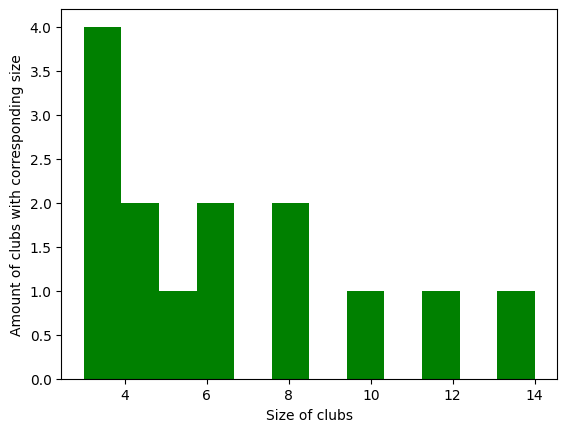

In [68]:
# plt.hist(size_of_clubs.values())
print(size_of_clubs.values())

plt.hist(size_of_clubs.values(), bins=12, color = 'green')
plt.xlabel("Size of clubs")
plt.ylabel("Amount of clubs with corresponding size")
plt.show()

(array([3., 1., 0., 6., 0., 1., 1., 0., 3., 3.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

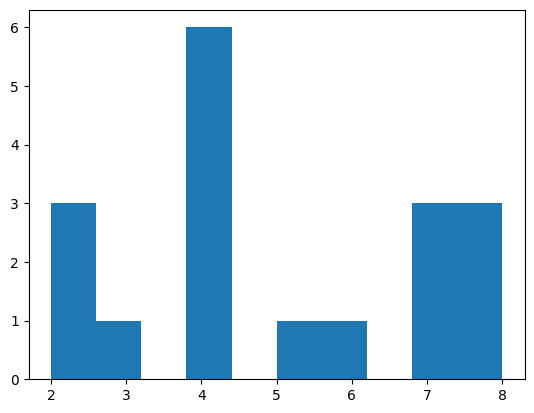

In [69]:
plt.hist(clubs_per_woman.values())

In [88]:
# Which clubs have the most members in common
club_members = {}
for node in clubs:
    club_members[node] = set([n for n in graph.neighbors(node)])
    

# print(club_members)
intersections = {}
clubs = [node for node in graph if graph.nodes[node]['bipartite'] == 1]

max_intersection = -1
for i in range(len(clubs)):
    for j in range(i+1, len(clubs)):
        res = len(set.intersection(club_members[clubs[i]], club_members[clubs[j]]))
        if res > max_intersection:
            max_intersection  = res
        intersections[(clubs[i], clubs[j])] = len(set.intersection(club_members[clubs[i]], club_members[clubs[j]]))
        
for k, v in intersections.items():
    if v == max_intersection:
        print (k, v)


('E8', 'E9') 9


In [89]:
overlap = {}

for club1 in clubs:
    for club2 in clubs:
        if club1 == club2:
            continue
        members_of_1 = set(graph[club1])
        members_of_2 = set(graph[club2])
        overlap[(club1, club2)] = len(members_of_1.intersection(members_of_2))
# print(overlap)
print(max(overlap, key=overlap.get))
print(overlap[('E8', 'E9')])

('E8', 'E9')
9


## Question 4 (20 pt)

Caveman graphs are defined as a graph consisting of $l$ disconnected cliques of size $k$. Networkx has a convenient function for generating these: `nx.caveman_graph`. In this caveman graph there are clear communities: the original cliques used to construct this graph. Finding communities in general is pretty hard, but in this specific case they are so obvious existing algorithms will (should) manage without issue. 

In this question you will investigate the quality of a few different embeddings algorithms using a caveman graph.

1. Write a function that does the following:

  a. Generate a caveman graph with l=5, k=10.
  
  b. Add random edges to the generated graph until the graph is connected and at least 20 edges have been added.

  If you don't manage, use the following snippet to get 0 points for this subquestion.
```py
    with open('caveman.pickle', 'rb') as jar:
        caveman_graph = pickle.load(jar)
```

2. Browse through the networkx documentation until you find an appropriate function to find the communities in your connected caveman graph. Make sure you find 5 communities of 10 nodes each. If you don't manage, use the following 5 communities: `{0-9}, {10-19}, {20-29}, {30-39}, {40-49}`.

3. In your own words, what is graph embedding? What are desirable properties for an embedding?

4. Embed your caveman graph. Use an existing networkx function.

5. Given the communities you found in 2., and the embedding you generated in 4., calculate for each community the average Euclidean distance between nodes within each community, and compare that to the Euclidean distances between communities. Note: For this question you do *not* need the distance in the graph (i.e. the number of edges between nodes), but the Euclidean distance in your embedding.
6. Is the embedding method you chose any good? Compare it with 2 other embedding methods. Does it matter in how many dimensions you embed the graph?


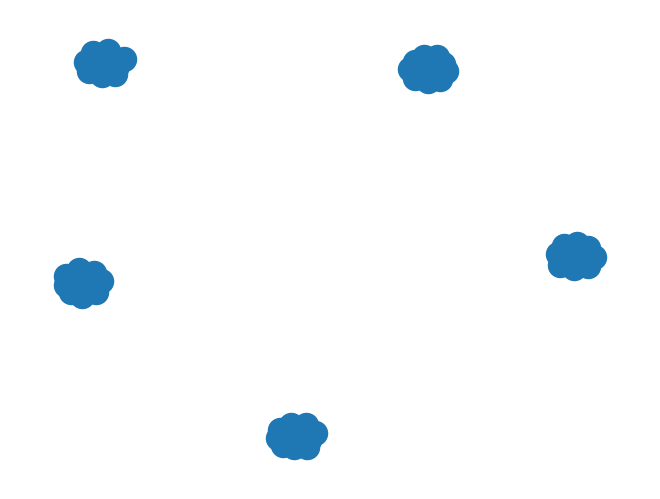

In [90]:
graph = nx.caveman_graph(l=5, k=10)
nx.draw(graph)

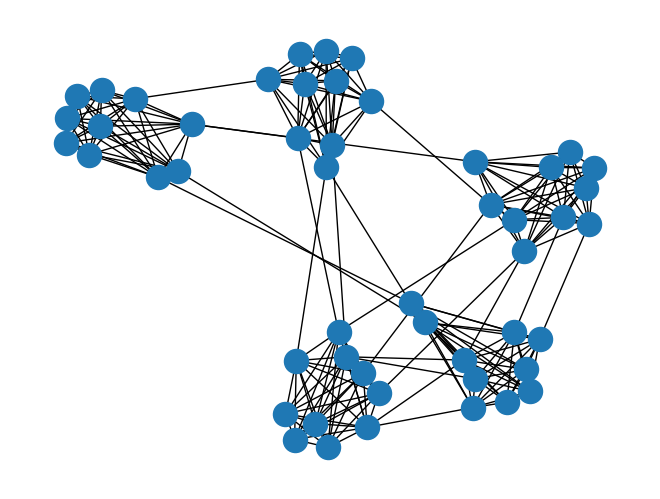

In [96]:
## Answers to Question 4
def build_graph():
    graph = nx.caveman_graph(l=5, k=10)
    starting_edges = len(graph.edges)
    while True:
        node1 = random.choice(list(graph.nodes))
        node2 = random.choice(list(graph.nodes))
        graph.add_edge(node1, node2)
        if nx.is_connected(graph) and (len(graph.edges) - starting_edges) >= 20:
            break
    return graph

graph = build_graph()
nx.draw(graph)
    

In [94]:
import networkx.algorithms.community as community

communities = community.louvain_communities(graph)
print(communities)
print([len(c) for c in communities])

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]
[10, 10, 10, 10, 10]


In [97]:
for c in nx.find_cliques(graph):
    print(c)

[0, 1, 2, 3, 4, 5, 8, 9, 6, 7]
[2, 28]
[6, 38]
[7, 30]
[9, 42]
[9, 26]
[17, 33, 34]
[17, 22]
[17, 15, 34]
[17, 15, 10, 11, 12, 13, 16, 18, 19, 14]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[20, 46]
[24, 12]
[24, 38]
[26, 19]
[30, 32, 33, 34, 35, 36, 31, 37, 38, 39]
[32, 34, 15]
[35, 43]
[37, 45]
[40, 41, 42, 43, 44, 45, 48, 49, 46, 47]
[44, 34]
[44, 14]
[46, 11]
[47, 19]


In [98]:
# Graph embedding is assigning coordinates to each node in a graph. Ideally closely related
# nodes get similar coordinates, and not connected nodes are well separated. In addition, if
# possible, edges do not cross.

In [99]:
embedding = nx.spring_layout(graph)
print(embedding)

{0: array([-0.9660695 , -0.12974813]), 1: array([-0.90436621,  0.13556423]), 2: array([-0.68445887, -0.2340127 ]), 3: array([-0.98672747,  0.07456609]), 4: array([-0.87992825,  0.0212782 ]), 5: array([-1.        , -0.02550803]), 6: array([-0.60709381,  0.04430897]), 7: array([-0.63324026,  0.14326862]), 8: array([-0.87969995, -0.09497087]), 9: array([-0.5878804 , -0.05153034]), 10: array([-0.06294685, -0.33044949]), 11: array([-0.11211747, -0.13760889]), 12: array([ 0.07606232, -0.39971756]), 13: array([-0.1778249 , -0.30302272]), 14: array([-0.04538484, -0.05163457]), 15: array([ 0.15892577, -0.14054848]), 16: array([-0.15216524, -0.4027938 ]), 17: array([ 0.20146305, -0.24309002]), 18: array([-0.05248805, -0.4346829 ]), 19: array([-0.00368742, -0.15317447]), 20: array([ 0.32573861, -0.54765762]), 21: array([ 0.27637912, -0.98123375]), 22: array([ 0.34524508, -0.77545744]), 23: array([ 0.40509082, -0.99693999]), 24: array([ 0.40876715, -0.63349626]), 25: array([ 0.50765494, -0.8322003

In [112]:
def get_distances_within_communities(embedding):
    within_comm_distances = []
    for community in communities:
        distances = []
        for node1 in community:
            for node2 in community:
                if node1 == node2: 
                    continue
                distance = np.sqrt(np.sum((embedding[node1] - embedding[node2])**2))
                distances.append(distance)
        within_comm_distances.append(np.average(distances))
    print(within_comm_distances)

def get_distances_between_communities(embedding):
    for i in range(len(communities)):
        for j in range(i+1, len(communities)):
            comm1 = communities[i]
            comm2 = communities[j]
            if comm1 == comm2: 
                continue
            distances = []
            for node1 in comm1:
                for node2 in comm2:
                    distance = np.sqrt(np.sum((embedding[node1] - embedding[node2])**2))
                    distances.append(distance)
            print('between', i ,' and ', j, ' ', np.average(distances))
            
embedding1 = nx.spring_layout(graph, dim=5)
get_distances_within_communities(embedding1)
get_distances_between_communities(embedding1)

embedding2 = nx.spectral_layout(graph)
get_distances_within_communities(embedding2)
get_distances_between_communities(embedding2)

embedding3 = nx.shell_layout(graph)
get_distances_within_communities(embedding3)
get_distances_between_communities(embedding3)
            

[0.36675974379369836, 0.37292596754960466, 0.3732400969280052, 0.38549699104072505, 0.37687610523305276]
between 0  and  1   2.24839815898609
between 0  and  2   1.6291159360901375
between 0  and  3   1.5908304078228372
between 0  and  4   1.9064796639534205
between 1  and  2   1.376145132410868
between 1  and  3   1.2767739886704301
between 1  and  4   1.2832576230795556
between 2  and  3   1.655835561161214
between 2  and  4   1.65254616784904
between 3  and  4   1.276197556483644
[0.08637310188141342, 0.057858026888288845, 0.10409523509363106, 0.07586324186695262, 0.06763978211552986]
between 0  and  1   1.3983585769223164
between 0  and  2   1.47707754836875
between 0  and  3   1.1246550453772381
between 0  and  4   1.3254401076414637
between 1  and  2   0.9725006351611857
between 1  and  3   0.49077288688030213
between 1  and  4   0.5061627339009394
between 2  and  3   1.2959329346295203
between 2  and  4   1.417875736343634
between 3  and  4   0.2168640161255016
[0.45181527713793

# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTReReExamSept_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!